![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/Users/Tomi/Desktop/my_git/dsbootcamp/week9/day5/competition/how-long-would-you-stay/train_set.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [12]:
df.shape


(100000, 18)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [14]:
df.columns = np.arange(len(df.columns))
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[17] = le.fit_transform(df[17])
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0


In [18]:

df[13] = le.fit_transform(df[13])
df[12] = le.fit_transform(df[15])
df[6] = le.fit_transform(df[6])
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,2,R,F,4.0,45810,2.0,2,2,2,21-30,2817.0,0


In [19]:
# PROBLEMA DE CLASIFICACIÓN
df[17].value_counts()

2     27452
1     24476
3     17311
5     10984
0      7427
4      3668
7      3297
10     2150
8      1470
9       908
6       857
Name: 17, dtype: int64

In [11]:
def encoder_serie(serie):
    encoder = {}
    for i, x in enumerate(serie):
        if not (x in encoder):
            encoder[x] = i
    serie = serie.map(encoder)
    return serie, encoder

In [20]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [21]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df.drop([0],1,inplace = True)

#### 1. Definir X e y

In [22]:
# coger las columnas 3, 4, 10, 11, 13, 15 para este modelo
X = np.array(df[[6]])
y = np.array(df[17])
X.shape

(98484, 1)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

#### 2. Dividir X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [25]:
random_state = 3
rkf = RepeatedKFold(n_splits=4, n_repeats=1, random_state=random_state)
for train in rkf.split(X):
    print(train)

(array([    1,     2,     4, ..., 98480, 98481, 98482]), array([    0,     3,     9, ..., 98469, 98474, 98483]))
(array([    0,     1,     2, ..., 98479, 98482, 98483]), array([   14,    22,    26, ..., 98475, 98480, 98481]))
(array([    0,     1,     2, ..., 98481, 98482, 98483]), array([    4,     5,    13, ..., 98472, 98476, 98479]))
(array([    0,     3,     4, ..., 98480, 98481, 98483]), array([    1,     2,     6, ..., 98477, 98478, 98482]))


## Kfold method

In [26]:
from sklearn.model_selection import KFold

# define the model
model = RandomForestClassifier()
# evaluate the model 
# THIS DOESN'T TRAIN THE MODEL
k_fold = KFold(n_splits=10, random_state=2)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[0.27160807 0.28290392 0.2775733  0.26818124 0.27719254 0.28265008
 0.27338495 0.26110688 0.27748159 0.28014725]
Accuracy: 0.275 (0.006)


In [27]:
X_train

array([[1],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

#### 3. Training
Aquí meteríais los parámetros

In [28]:
import pickle

#### 4. Entrenar el modelo con X_train, y_train

In [29]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=2, random_state=1)
val_score = []
train_score = []
# define the model
model = RandomForestClassifier()
path = "/Users/Tomi/Desktop/my_git/dsbootcamp/week9/day5/competition"
for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    print("val:", val)
    print("val_size:", len(val))

    print("batch:", X_train[train])
    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)
    
    # Ejemplo de guardar y parar el entrenamiento por haber conseguido un buen resultado
    if np.mean(val_score) > 0.98 and len(val_score) > 1000:
        pickle.dump(model, open(path + "model_saved.sav", "wb"))
        print("STOP")
        break

Iteración: 1
train/índices batch: [    0     1     2 ... 78784 78785 78786]
batch_size: 74847
val: [   38    63    77 ... 78709 78711 78712]
val_size: 3940
batch: [[1]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
Iteración: 2
train/índices batch: [    0     2     3 ... 78784 78785 78786]
batch_size: 74847
val: [    1    28    30 ... 78707 78742 78775]
val_size: 3940
batch: [[1]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
Iteración: 3
train/índices batch: [    0     1     2 ... 78784 78785 78786]
batch_size: 74847
val: [   24    25    84 ... 78699 78725 78780]
val_size: 3940
batch: [[1]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
Iteración: 4
train/índices batch: [    0     1     2 ... 78784 78785 78786]
batch_size: 74847
val: [   32    54    67 ... 78723 78759 78766]
val_size: 3940
batch: [[1]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
Iteración: 5
train/índices batch: [    0     1     2 ... 78784 78785 78786]
batch_size: 74847
val: [   10    12    19 ... 78743 78744 78765]
val_size: 3940
batch: [[1]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
Itera

[0.2654822335025381,
 0.267258883248731,
 0.27106598984771574,
 0.2781725888324873,
 0.28527918781725886,
 0.265989847715736,
 0.2814720812182741,
 0.27443513582127443,
 0.2731657781162732,
 0.27443513582127443,
 0.28128966742828126,
 0.2871287128712871,
 0.27367352119827365,
 0.2838283828382838,
 0.2792586951002793,
 0.2637725310992638,
 0.26605737496826604,
 0.26554963188626557,
 0.2863670982482864,
 0.2807819243462808,
 0.2802030456852792,
 0.2748730964467005,
 0.27715736040609135,
 0.26624365482233503,
 0.2642131979695431,
 0.2657360406091371,
 0.27106598984771574,
 0.26961157654226964,
 0.28662096978928664,
 0.2751967504442752,
 0.27824320893627824,
 0.28357451129728356,
 0.2729119065752729,
 0.2754506219852754,
 0.27341964965727344,
 0.27037319116527037,
 0.2691038334602691,
 0.2807819243462808,
 0.2802741812642803,
 0.2878903274942879]

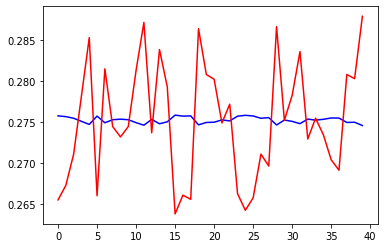

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")
val_score

In [27]:
model.score(X_test, y_test)

0.2849164847438696

In [31]:
k_fold = KFold(n_splits=4, random_state=1)

[model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]

[0.27963649286693404,
 0.2713611209828908,
 0.2746103467533127,
 0.27437043054427296]

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [32]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

#### 6. Sacar métricas, valorar el modelo 

In [33]:
model.score(X_test,y_test)

0.2724272731888105

In [34]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2724272731888105


## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [35]:
to_pred = pd.read_csv("/Users/Tomi/Desktop/my_git/dsbootcamp/week9/day5/competition/how-long-would-you-stay/test_set.csv")

In [36]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0


In [37]:
to_pred.shape

(133744, 17)

In [38]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred = to_pred.fillna(0)

In [39]:
to_pred['3'] = le.fit_transform(to_pred['3'])
to_pred['13'] = le.fit_transform(to_pred['13'])
to_pred['15'] = le.fit_transform(to_pred['15'])
to_pred['6'] = le.fit_transform(to_pred['6'])
to_pred.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,6,Y,4,2,S,C,2.0,59278,8.0,Emergency,1,2,4,4778.0


In [40]:
predictions_submit = model.predict(to_pred[['6']])
predictions_submit

array([2, 2, 2, ..., 2, 2, 2])

In [41]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,2
1,208989,2
2,305872,2
3,266099,2
4,13228,2
...,...,...
133739,318155,2
133740,144850,2
133741,180676,2
133742,39933,2


In [42]:
sample = pd.read_csv("/Users/Tomi/Desktop/my_git/dsbootcamp/week9/day5/competition/how-long-would-you-stay/sample_submission.csv")

In [43]:
sample.shape

(133744, 2)

In [44]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
